# **Crash Course on Causality Worked Examples**

Author: Shreyas Dasari

# **Preparing the Iris Dataset for Causal Analysis in Machine Learning**

### Abstract

This crash course offers a comprehensive guide on preparing the Iris dataset for causal analysis in machine learning. The Iris dataset, a classic in the field, is an excellent resource for demonstrating how data preparation critically influences the outcomes of machine learning models, particularly in causal analysis. The course covers the necessary steps of data collection, cleaning, feature selection, and transformation, with a focus on understanding the relationship between features and their potential causal effect on the target variable. By blending theoretical concepts with practical implementation, this course aims to provide a deep understanding of the role of causality in machine learning and how it differs from mere correlation.

![Iris](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

### Aim

The primary aim of this course is to guide learners through the meticulous process of preparing the Iris dataset for effective causal analysis in a machine learning context. The objectives include:

1. **Understanding Causality**: To elucidate the concept of causality in machine learning and its significance in contrast to correlation.
2. **Data Preparation**: Demonstrating how to properly collect, clean, and transform data for causal analysis.
3. **Feature Analysis**: Exploring feature selection and engineering to enhance the model's ability to uncover causal relationships.
4. **Practical Application**: Implementing these concepts in Python to prepare the Iris dataset for causal machine learning analysis.

### Causality and Correlation Difference

Understanding the difference between causality and correlation is pivotal in data science and machine learning. Correlation refers to a relationship or association between two or more variables, where changes in one variable correspond to changes in another. However, this does not imply that one variable causes the changes in the other. Causality, on the other hand, goes a step further by establishing a cause-and-effect relationship. In causal relationships, changes in one variable (cause) directly lead to changes in another (effect). This course emphasizes the importance of distinguishing between these two concepts, especially when preparing data for analysis, as misinterpreting correlation for causation can lead to erroneous conclusions and ineffective models.

### How Iris Dataset is Useful in Causality

The Iris dataset is an exemplary case for demonstrating causality in machine learning due to several reasons:

1. **Well-defined Features**: The dataset contains clearly defined and measurable features (sepal length, sepal width, petal length, and petal width) which are crucial in determining the species of iris flowers.
2. **Clear Target Variable**: The species classification provides a clear target variable, allowing for an investigation into how different features causally affect this classification.
3. **Simplicity and Completeness**: The simplicity and the lack of missing data in the Iris dataset make it an ideal candidate for learners to easily grasp and apply causal analysis concepts without the complexities of extensive data cleaning or preprocessing.
4. **Potential for Feature Engineering**: The dataset allows for creative feature engineering, such as calculating the area of sepals and petals, providing additional dimensions for causal exploration.

By utilizing the Iris dataset, participants will gain hands-on experience in distinguishing between causality and correlation, conducting comprehensive data preparation, and applying these concepts in a practical machine learning task. This course aims to build a strong foundation in causal analysis, equipping learners with the skills necessary to apply these techniques in more complex datasets and scenarios.

# **Installing and Importing all the required packages and Libraries**

In [91]:
# Installing libraries and packages and importing
!pip install lingam
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Feature Engineering: Adding new features
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']

# Data Normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_normalized = pd.DataFrame(scaled_features, columns=df.columns)

df_normalized.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_area,petal_area
0,-0.900681,1.019004,-1.340227,-1.315444,0.008098,-1.174041
1,-1.143017,-0.131979,-1.340227,-1.315444,-0.932024,-1.174041
2,-1.385353,0.328414,-1.397064,-1.315444,-0.830551,-1.178299
3,-1.506521,0.098217,-1.283389,-1.315444,-1.063343,-1.169783
4,-1.021849,1.249201,-1.340227,-1.315444,0.052866,-1.174041


In [92]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_area,petal_area,species
0,5.1,3.5,1.4,0.2,17.85,0.28,setosa
1,4.9,3.0,1.4,0.2,14.70,0.28,setosa
2,4.7,3.2,1.3,0.2,15.04,0.26,setosa
3,4.6,3.1,1.5,0.2,14.26,0.30,setosa
4,5.0,3.6,1.4,0.2,18.00,0.28,setosa


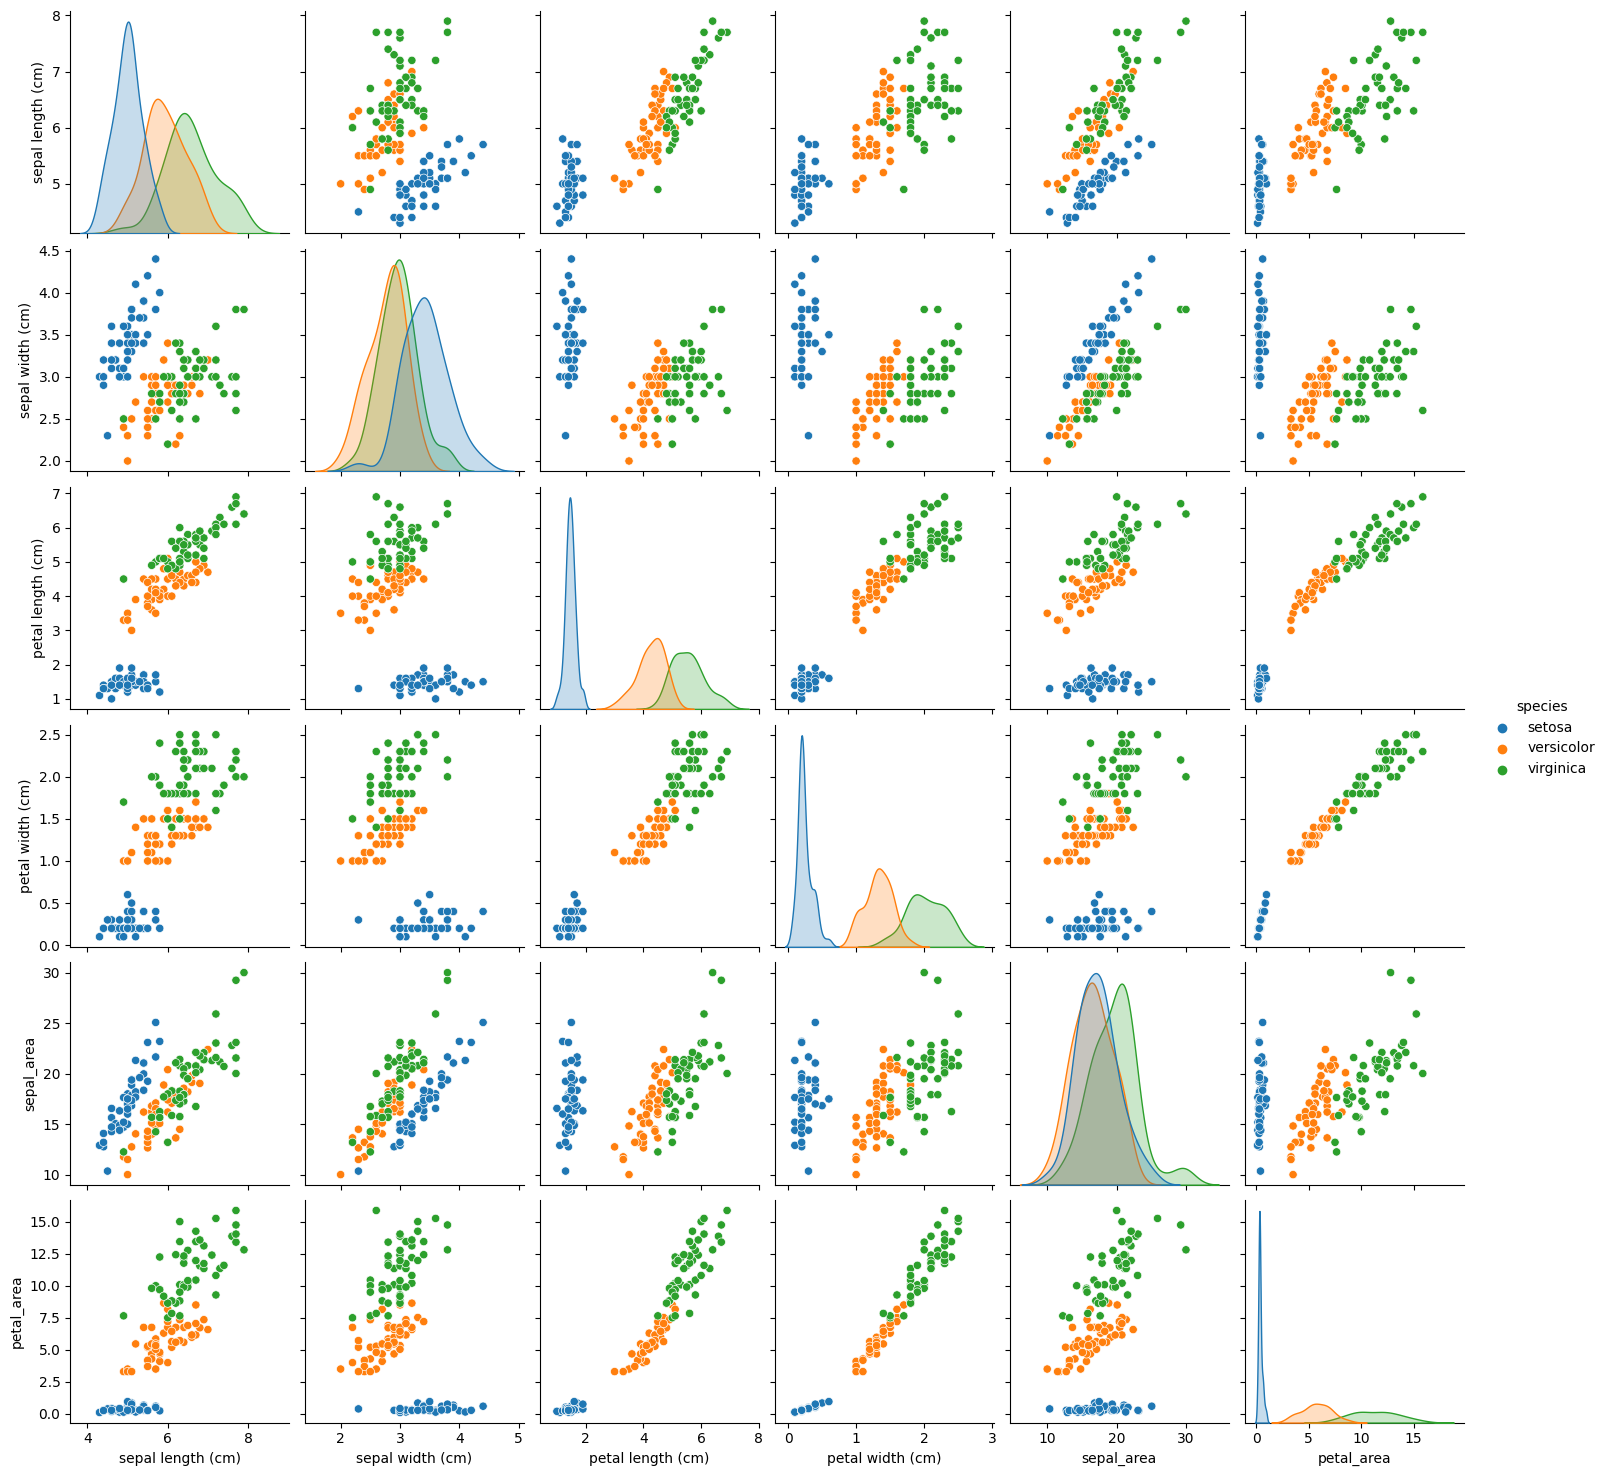

In [93]:
import seaborn as sns
sns.pairplot(df, hue='species')

# Understanding Pair Plot
A pair plot (or scatterplot matrix) is a matrix of scatter plots that visualize the pairwise relationships between different variables in a dataset. For the Iris dataset, which typically includes four features (sepal length, sepal width, petal length, and petal width) and a species classification, the pair plot helps in understanding how each feature correlates with the others.

### Interpretation of the Plot
- **Correlation Between Features**: Scatter plots help in identifying the correlation between pairs of features. For instance, a linear pattern between 'petal length' and 'petal width' suggests a positive correlation.
  
- **Species Distribution**: The color-coding helps in visualizing how each species is distributed across different feature values and whether certain species are more easily separable based on certain features.

- **Feature Distributions**: The histograms on the diagonal show how each feature's values are distributed, revealing patterns like skewness or modality.

- **Outliers and Anomalies**: Scatter plots can also help in spotting outliers or anomalies within the data.

The pair plot is a powerful exploratory tool to understand the relationships within multi-dimensional data. For the Iris dataset, it particularly helps in visualizing how different species are characterized by the features and how these features relate to each other, providing valuable insights for classification tasks and feature selection.

Petal_length, Petal_width, Sepal_Width, Sepal_length show strong correlation between eachother.

In [94]:
#converting diabetes feature into 0 and 1
df['species'] = df['species'].map({'setosa':0,'versicolor':1,'virginica':2})
df['species']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_area,petal_area,species
0,5.1,3.5,1.4,0.2,17.85,0.28,0
1,4.9,3.0,1.4,0.2,14.70,0.28,0
2,4.7,3.2,1.3,0.2,15.04,0.26,0
3,4.6,3.1,1.5,0.2,14.26,0.30,0
4,5.0,3.6,1.4,0.2,18.00,0.28,0


<ipython-input-95-feb4deb37293>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

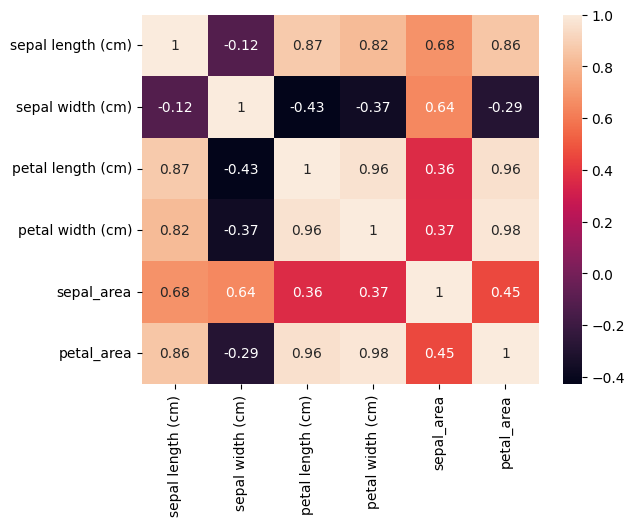

In [95]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

In [96]:
# Building a model
X = df.drop('species', axis=1)
y = df['species']

In [97]:
#Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier model with 10 trees
rf_model = RandomForestClassifier(n_estimators=10)

# Fit the model to the data
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [99]:
y_pred = rf_model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [100]:
from sklearn.metrics import mean_absolute_error
score = rf_model.score(X_test, y_test)
print(f"R^2 score on test set: {score:.3f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE = {round(mae, 3)} ")

R^2 score on test set: 1.000
MAE = 0.0 


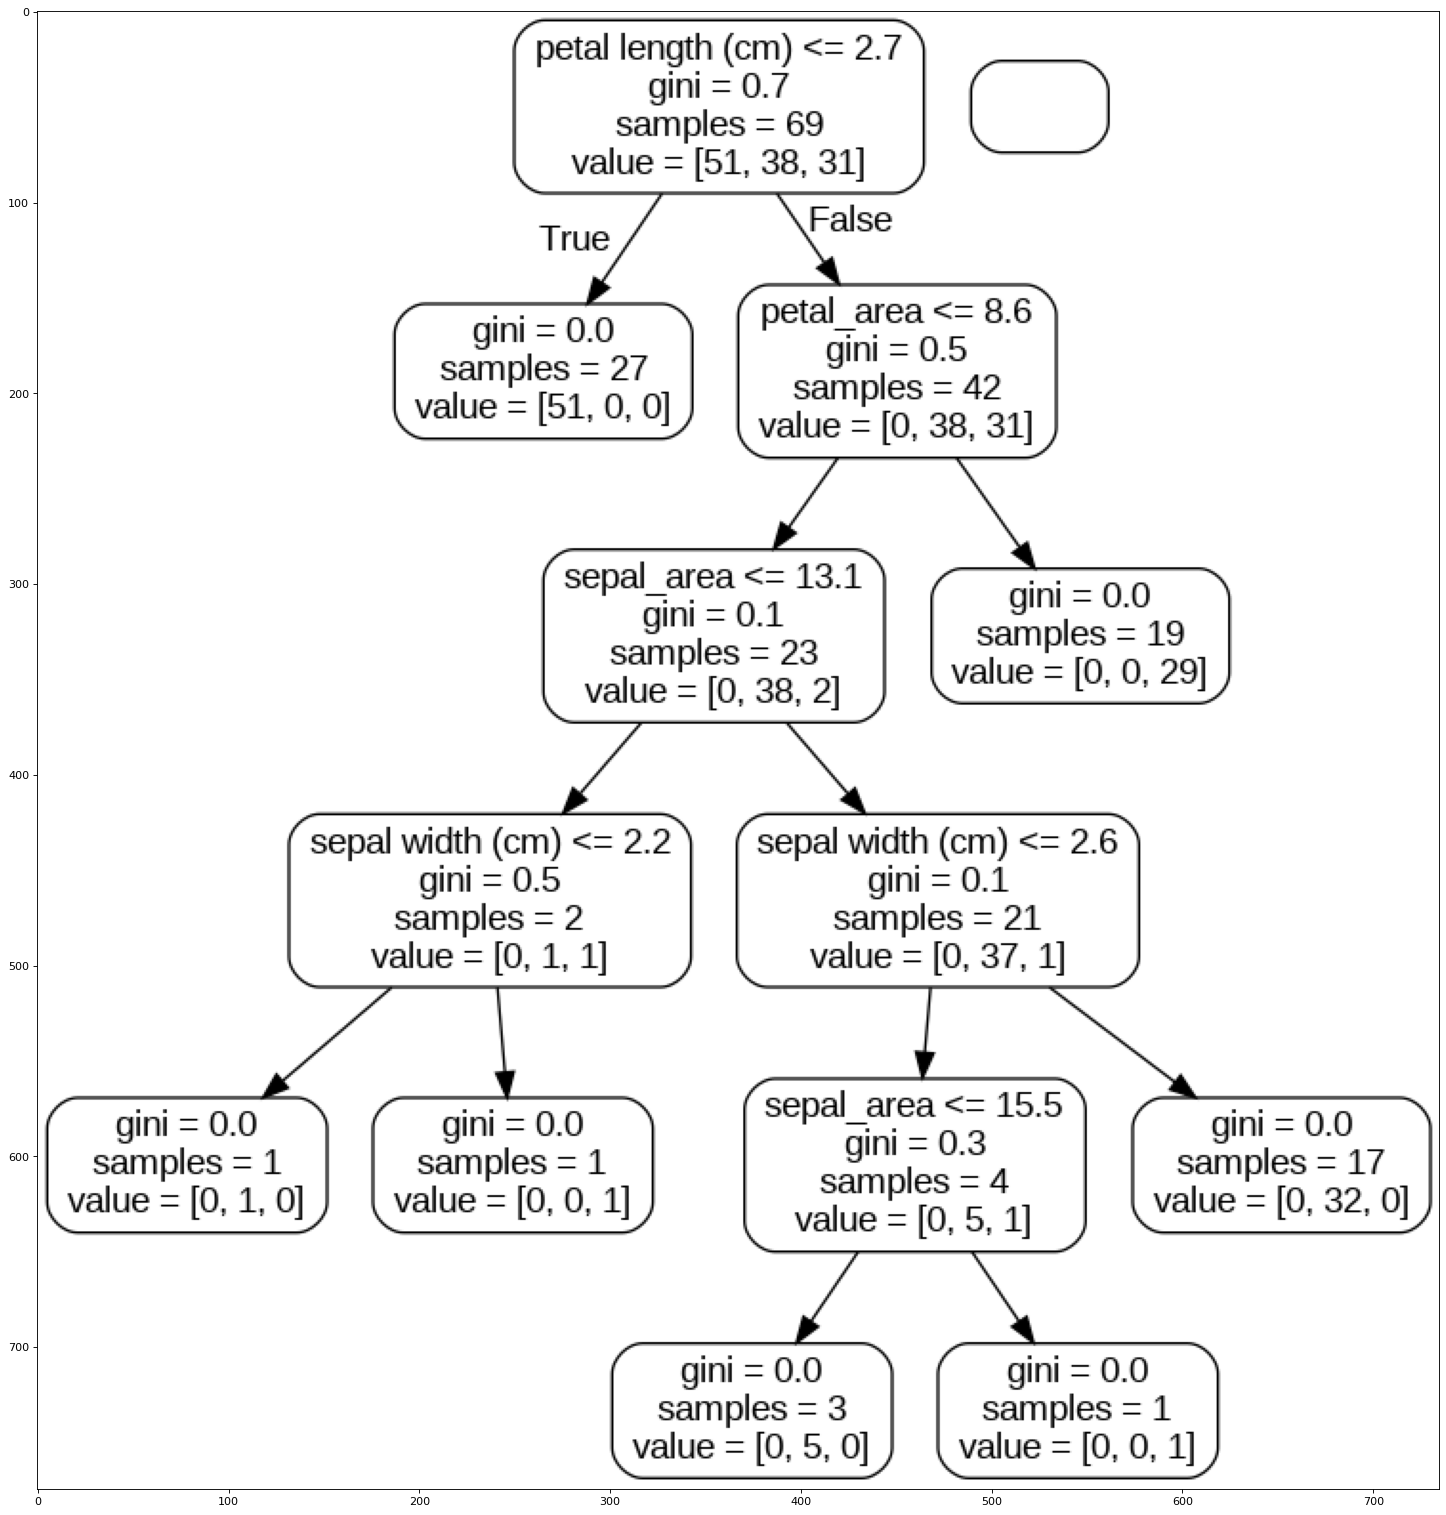

In [101]:
# Visualization of Nodes for the purpose of explainability
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.image as mpimg
figure(figsize=(32, 24), dpi=80)
tree = rf_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(X_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

# Expected Result and Interpretation for the Iris Dataset:

- **Visual Representation of a Decision Tree**: The output is a graphical representation of a single decision tree from the random forest model. This tree is part of an ensemble that collectively makes predictions in the random forest.

- **Tree Nodes and Splits**:
   - Each internal node of the tree represents a decision rule based on one of the features (like petal length or sepal width).
   - The branches represent the outcome of the decision rule, leading to either another decision node or a leaf node.

- **Leaf Nodes**:
   - Leaf nodes represent the final decisions or classifications. In the context of the Iris dataset, each leaf will likely correspond to one of the three species of iris flowers.
   - The path from the root to each leaf represents a set of conditions that leads to that particular classification.

- **Explainability**:
   - This visualization is particularly useful for understanding how individual decisions are made within the model.
   - It provides insights into which features are important and how different feature values can lead to different predictions.

Visualizing a decision tree from a random forest model offers an intuitive understanding of the decision-making process in the model, especially for classification tasks like the Iris species prediction. It showcases the feature importance and the decision rules the model uses, enhancing the explainability of otherwise complex ensemble models. However, it's important to remember that this is just one tree out of many in the forest, and the collective decision of all trees determines the final output of the random forest model.

### Potential Causal Insights from Decision Trees
1. **Feature Importance**: Decision trees provide insights into which features are most influential in making predictions. In some cases, this can hint at potential causal relationships, especially if domain knowledge supports the idea that a certain feature is a likely cause of the outcome.
   
2. **Decision Rules**: The splits in a decision tree represent conditions under which certain outcomes occur. If a feature consistently appears at the top splits of the tree (near the root), it might suggest that this feature plays a significant role in determining the outcome. In causal terms, this could be interpreted as a hypothesis that the feature has a causal effect on the outcome.

3. **Intervention Simulation**: By tracing the paths in a decision tree, one can simulate the effect of interventions (changing feature values) and observe how these changes might lead to different outcomes. This aligns with the concept of counterfactual reasoning in causal inference.


While decision trees provide valuable insights into feature importance and decision-making processes, caution should be exercised in drawing direct causal inferences from them. For robust causal analysis, more specialized methods and models, often grounded in domain-specific knowledge and designed specifically for causal inference, are required. Decision trees can, at best, be used as exploratory tools to generate hypotheses about potential causal relationships, which should then be tested with more rigorous causal inference methodologies.

In [102]:
# Get numerical feature importances
tree_importances = list(rf_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(X_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [103]:
# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: petal_area           Importance: 0.39
Variable: petal width (cm)     Importance: 0.26
Variable: petal length (cm)    Importance: 0.23
Variable: sepal length (cm)    Importance: 0.1
Variable: sepal width (cm)     Importance: 0.02
Variable: sepal_area           Importance: 0.01


# **Causal Statistical Method: LiNGAM**

In [104]:
from lingam import DirectLiNGAM

model = DirectLiNGAM()
model.fit(df.iloc[:, :4])  # Considering only the numerical features
print(model.causal_order_)
print(model.adjacency_matrix_)

[2, 3, 1, 0]
[[ 0.          0.65083716  0.70913196 -0.55648266]
 [ 0.          0.         -0.25713775  0.36404206]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.41575542  0.        ]]


### Understanding DirectLiNGAM Output

1. **Causal Order (`model.causal_order_`)**:
   - **Output:** `[2, 3, 1, 0]`
   - **Explanation:** This array represents the inferred causal order of the variables (features) in the dataset. The numbers correspond to the indices of the features. Assuming the features are ordered as [sepal length, sepal width, petal length, petal width], this output suggests that petal length (index 2) is the first cause, followed by petal width (3), sepal width (1), and finally sepal length (0).
   - **Significance:** It implies that, according to the model, changes in petal length might be the starting point of causal effects within these features, influencing other features in the order specified.

2. **Adjacency Matrix**:
   - **Explanation:** The adjacency matrix represents the strength and direction of causal effects between variables. A non-zero entry at `[i, j]` indicates a causal effect from variable `i` to `j`. For example, the value `0.65083716` at `[0, 1]` indicates a causal effect from sepal length to sepal width.
   - **Significance:** This matrix quantifies the causal relationships, with the magnitude indicating the strength of the effect. Zero values suggest no direct causal effect between those specific variables.

### Interpretation and Implications

- **Petal Length as Primary Cause**: The causal order suggests that petal length is the most fundamental feature in this causal structure, potentially influencing other features directly or indirectly.
- **Inter-feature Influences**: The adjacency matrix suggests specific causal relationships, such as a notable effect of sepal length on petal length and width.
- **Absence of Backward Causation**: Zero rows, like for petal length, indicate that this feature is not caused by any of the other features in the dataset.
- **Direct vs. Indirect Effects**: While the adjacency matrix shows direct effects, it does not detail indirect causal paths (e.g., sepal length influencing petal width through petal length).


The LiNGAM output provides an interesting perspective on the potential causal relationships between the Iris dataset's features. It offers a starting point for understanding how different features might causally influence each other, although these findings should be validated and interpreted within the broader context of the subject matter.

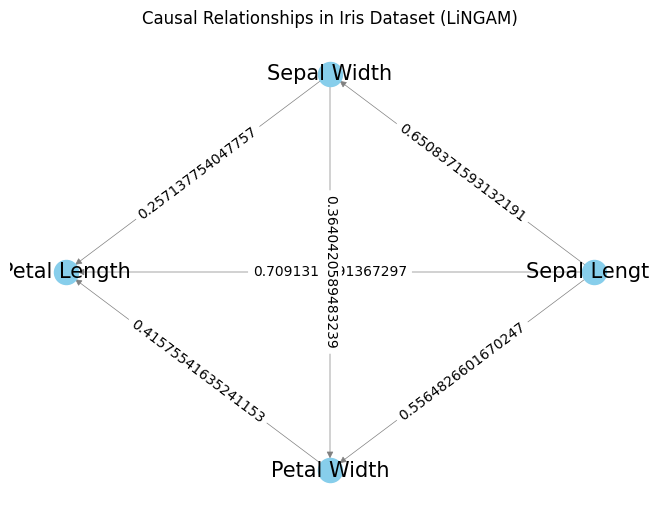

In [105]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is the fitted DirectLiNGAM model
adjacency_matrix = model.adjacency_matrix_

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes (features of Iris dataset)
nodes = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
G.add_nodes_from(nodes)

# Adding directed edges based on adjacency matrix
for i, origin_node in enumerate(nodes):
    for j, destination_node in enumerate(nodes):
        weight = adjacency_matrix[i, j]
        if weight != 0:
            G.add_edge(origin_node, destination_node, weight=np.abs(weight))

# Drawing the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', width=0.5, font_size=15, arrows=True)

# Display weights on edges
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Causal Relationships in Iris Dataset (LiNGAM)')
plt.show()

# Interpretation of the Visualization:

- **Directed Edges**: Arrows indicate the direction of the inferred causal relationship.
- **Edge Weights**: The weights on the edges represent the strength of the causal effect.
- **Network Structure**: The structure of the network helps in understanding which variables directly influence others, providing insights into potential causal pathways.

The provided code snippet creates a visual representation of the causal relationships between the features of the Iris dataset as inferred by the DirectLiNGAM model. Let's break down how the code works and what its output signifies.

- **Visualization of Causal Structure**: The plot is a circular graph where each node represents a feature of the Iris dataset. Directed edges (arrows) between nodes indicate the inferred causal directions as per the LiNGAM model.
  
- **Strength of Causal Effects**: The weights on the edges show the magnitude of the causal effect. A higher weight suggests a stronger causal influence of one feature on another.

- **Causal Directions**: The direction of the arrows illustrates which features are predicted to causally influence others. For instance, an arrow from 'Sepal Length' to 'Petal Length' would suggest that changes in sepal length have a causal impact on petal length.

- **Significance of the Graph**: This graphical representation provides an intuitive understanding of the causal dynamics within the Iris dataset according to the LiNGAM analysis. It helps in visualizing complex interdependencies between features that might not be immediately apparent from raw data or statistical outputs.

The visualization offers a clear and interpretable way to understand the potential causal relationships in the Iris dataset as identified by the LiNGAM model.

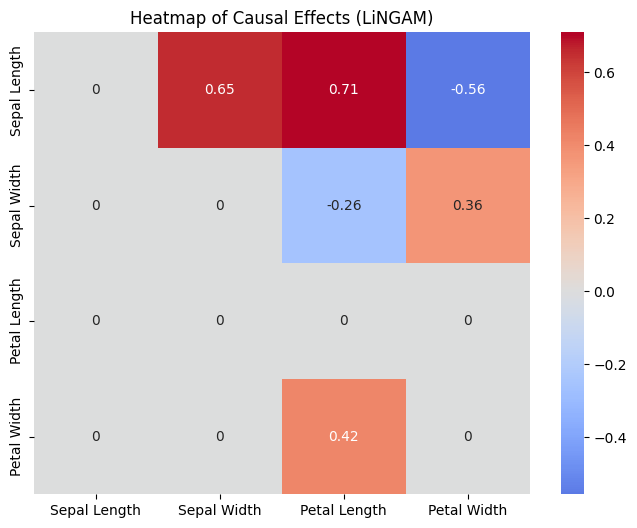

In [106]:
import seaborn as sns

# Extracting the adjacency matrix
adj_matrix = model.adjacency_matrix_

# Creating a DataFrame for better visualization
adj_df = pd.DataFrame(adj_matrix, columns=nodes, index=nodes)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(adj_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Causal Effects (LiNGAM)')
plt.show()

# **HeatMap Inference**

Sepal Length has a causal effect on Sepal Width and Petal length

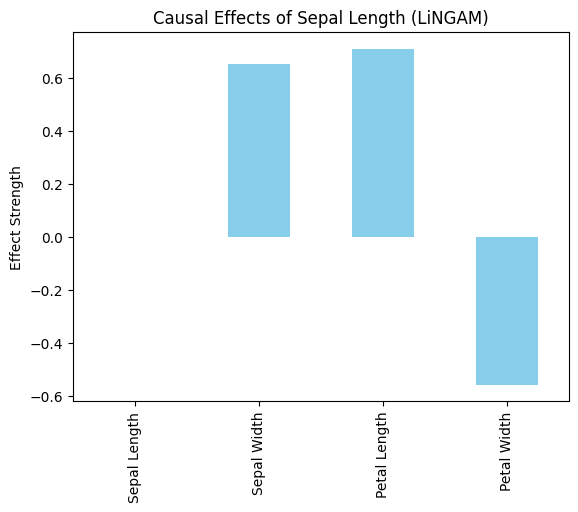

In [107]:
# Assuming we focus on the causal effects of 'Sepal Length'
effects = adj_df.loc['Sepal Length']

effects.plot(kind='bar', color='skyblue')
plt.title('Causal Effects of Sepal Length (LiNGAM)')
plt.ylabel('Effect Strength')
plt.show()

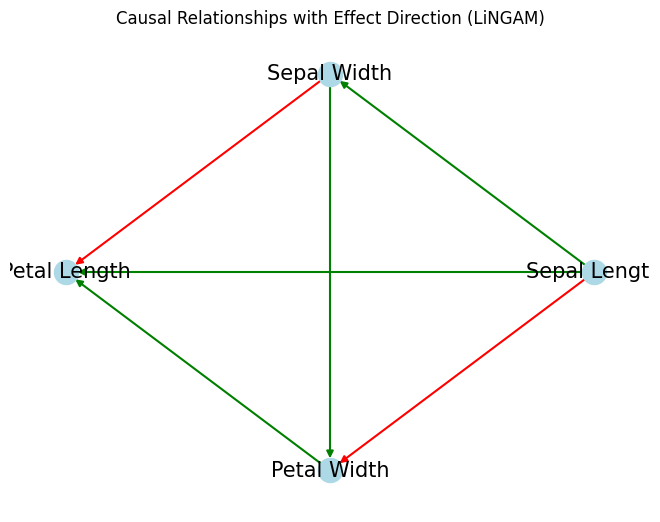

In [108]:
# Creating the directed graph with colored edges
for i, origin_node in enumerate(nodes):
    for j, destination_node in enumerate(nodes):
        weight = adjacency_matrix[i, j]
        if weight != 0:
            color = 'green' if weight > 0 else 'red'
            G.add_edge(origin_node, destination_node, weight=np.abs(weight), color=color)

edges = G.edges(data=True)
colors = [edge[2]['color'] for edge in edges]

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=colors, width=1.5, font_size=15, arrows=True)
plt.title('Causal Relationships with Effect Direction (LiNGAM)')
plt.show()

# **Plot Interpretation**

**Understanding Edge Colors:**

Green edges represent positive causal effects, where an increase in the originating feature is associated with an increase in the feature it points to.
Red edges represent negative causal effects, where an increase in the originating feature is associated with a decrease in the feature it points to.

**Causal Directions:** The directionality of the edges (arrows) illustrates the predicted causal influence of one feature over another.

**Significance of Colored Edges:** The color-coding adds an extra layer of information to the causal graph, making it easier to understand not just the existence but also the nature of the causal relationships.

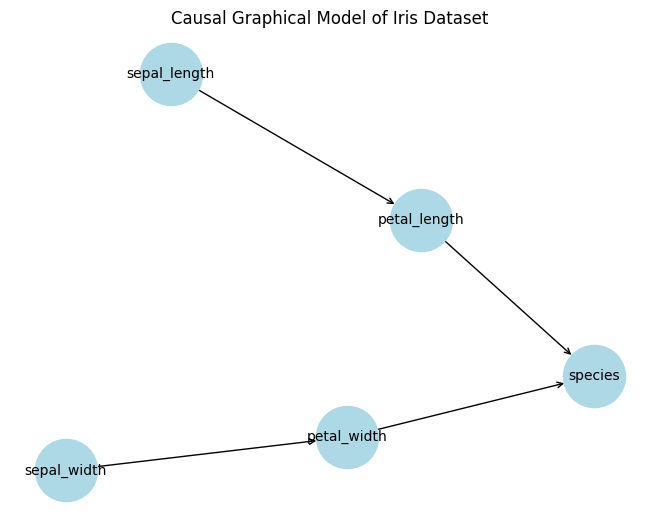

In [109]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a directed graph
G = nx.DiGraph()
edges = [
    ('sepal_length', 'petal_length'),
    ('sepal_width', 'petal_width'),
    ('petal_length', 'species'),
    ('petal_width', 'species')
]

G.add_edges_from(edges)

# Drawing the graph
pos = nx.spring_layout(G)  # or choose another layout
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, arrowstyle='->', arrowsize=10)
plt.title('Causal Graphical Model of Iris Dataset')
plt.show()

# **Interpretation and Significance**

**Visual Representation of Causal Hypotheses:** The graph visually represents hypothesized causal relationships between features of the Iris dataset (sepal length, sepal width, petal length, petal width) and the species classification.

**Understanding Causal Directions:** Arrows in the graph indicate the direction of the hypothesized causal effect. For instance, an arrow from sepal_length to petal_length suggests that variations in sepal length might causally influence variations in petal length.

**Causal Pathways to Species Classification:** Arrows pointing to species from petal_length and petal_width indicate that these features are hypothesized to have a direct causal influence on the species classification of the Iris flowers.

**Facilitates Hypothesis Generation:** Such a graph is useful for generating hypotheses about causal relationships, which can then be tested with appropriate statistical methods or experiments.

# **Conclusion**

**Causal Analysis with LiNGAM:**

The application of the DirectLiNGAM model was a highlight, revealing intriguing potential causal orders among the features. For instance, it suggested that petal length could be a primary causal feature, influencing other attributes and ultimately the species classification.
The adjacency matrix from the LiNGAM model provided quantitative insights into the strengths of these causal relationships.

### Causal Insights

**Feature Influences on Species Classification:**

The analyses suggested that certain features, particularly petal length and width, might have a more direct influence on species classification. This is consistent with botanical knowledge about Iris flowers.
The causal effects, as per LiNGAM, indicated specific pathways such as the influence of sepal length on petal length and width.

The Crash Course on Causality with the Iris Dataset served as a practical introduction to causal inference in machine learning. It emphasized the importance of distinguishing between correlation and causation, a crucial aspect often overlooked in standard data analysis. This course also highlighted the value of visualization in comprehending complex causal relationships and the importance of domain knowledge in interpreting these relationships.

# **References**

https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/

https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2

https://medium.com/swlh/using-granger-causality-test-to-know-if-one-time-series-is-impacting-in-predicting-another-6285b9fd2d1c

https://www.kaggle.com/code/keshariji/emerging-market-currency-pairs-impact-on-usdinr/notebook

https://sites.google.com/view/sshimizu06/lingam

# **License**

Copyright (c) 2023 Shreyas Dasari

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.